In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Load Diabetes Dataset
- We are going to load the Diabetes dataset from sklearn directly.
- Target variable: Quantitative measure of disease progression.

In [3]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


## Linear Regression without Regularization

In [7]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression without Regularization:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Linear Regression without Regularization:
Train MSE: 2835.0372
Test MSE: 2992.5812
Train R²: 0.5332
Test R²: 0.4384


## Linear Regression with Polynomial Features (Inducing Overfitting)

In [8]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Split polynomial data
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)

# Train Linear Regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

# Predict
y_poly_train_pred = lr_poly.predict(X_poly_train)
y_poly_test_pred = lr_poly.predict(X_poly_test)

# Evaluate
poly_train_mse = mean_squared_error(y_train, y_poly_train_pred)
poly_test_mse = mean_squared_error(y_test, y_poly_test_pred)
poly_train_r2 = r2_score(y_train, y_poly_train_pred)
poly_test_r2 = r2_score(y_test, y_poly_test_pred)

print("\nLinear Regression with Polynomial Features (Degree=3):")
print(f"Train MSE: {poly_train_mse:.4f}")
print(f"Test MSE: {poly_test_mse:.4f}")
print(f"Train R²: {poly_train_r2:.4f}")
print(f"Test R²: {poly_test_r2:.4f}")


Linear Regression with Polynomial Features (Degree=3):
Train MSE: 9794.9007
Test MSE: 107765.4103
Train R²: -0.6127
Test R²: -19.2226


## Linear Regression with Regularization (Ridge)

In [9]:
# Train Ridge Regression on polynomial features
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly_train, y_train)

# Predict
y_ridge_train_pred = ridge.predict(X_poly_train)
y_ridge_test_pred = ridge.predict(X_poly_test)

# Evaluate
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)

print("\nRidge Regression with Polynomial Features (Degree=3):")
print(f"Train MSE: {ridge_train_mse:.4f}")
print(f"Test MSE: {ridge_test_mse:.4f}")
print(f"Train R²: {ridge_train_r2:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")


Ridge Regression with Polynomial Features (Degree=3):
Train MSE: 1179.5418
Test MSE: 13232.3171
Train R²: 0.8058
Test R²: -1.4831


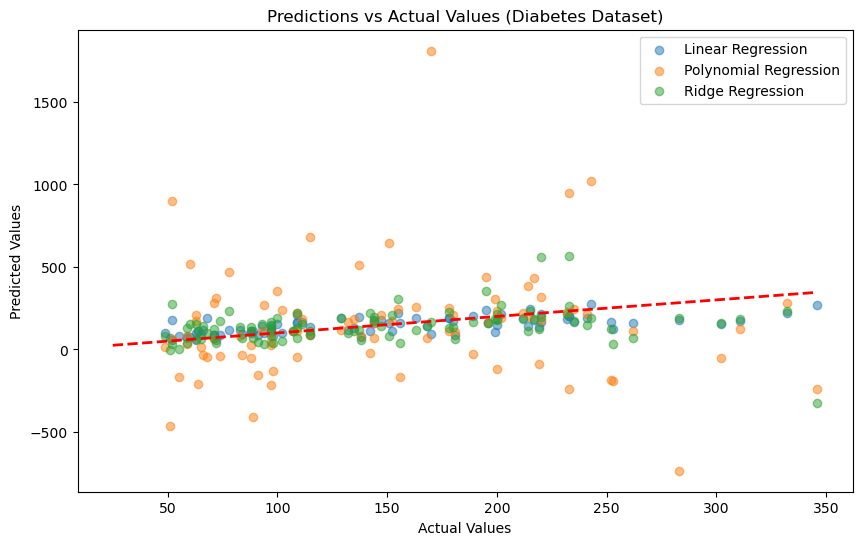

In [10]:
# Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_poly_test_pred, alpha=0.5, label='Polynomial Regression')
plt.scatter(y_test, y_ridge_test_pred, alpha=0.5, label='Ridge Regression')
ymin = y.min()
ymax = y.max()
plt.plot([ymin, ymax], [ymin, ymax], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values (Diabetes Dataset)')
plt.legend()
plt.savefig('diabetes_predictions_comparison.png')
plt.show()